<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/Cat%20and%20Dog%20Classifer/Cat_and_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-03-30 12:20:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c10::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   182MB/s    in 0.4s    

2020-03-30 12:20:54 (182 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp')

['cats_and_dogs_filtered.zip', '__pycache__', 'cats_and_dogs_filtered']

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'

#training and validation directory
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#training directory
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

#validation directory
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


print('Total training cat images.   ',len(os.listdir(train_cats_dir)))
print('Total training dog images.   ',len(os.listdir(train_dogs_dir)))

print('Total Validation cat images.   ',len(os.listdir(validation_cats_dir)))
print('Total Validation dog images.   ',len(os.listdir(validation_dogs_dir)))

['cat.812.jpg', 'cat.678.jpg', 'cat.788.jpg', 'cat.665.jpg', 'cat.379.jpg', 'cat.994.jpg', 'cat.950.jpg', 'cat.825.jpg', 'cat.835.jpg', 'cat.484.jpg']
['dog.945.jpg', 'dog.489.jpg', 'dog.278.jpg', 'dog.382.jpg', 'dog.578.jpg', 'dog.573.jpg', 'dog.379.jpg', 'dog.689.jpg', 'dog.615.jpg', 'dog.664.jpg']
Total training cat images.    1000
Total training dog images.    1000
Total Validation cat images.    500
Total Validation dog images.    500


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled here
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=50,
                              validation_steps=50,
                              verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
10/10 - 13s - loss: 2.3858 - acc: 0.4650 - val_loss: 0.6928 - val_acc: 0.5050
Epoch 2/50
10/10 - 13s - loss: 0.7460 - acc: 0.5550 - val_loss: 0.6930 - val_acc: 0.5010
Epoch 3/50
10/10 - 13s - loss: 0.7090 - acc: 0.5300 - val_loss: 0.6859 - val_acc: 0.5080
Epoch 4/50
10/10 - 13s - loss: 0.6907 - acc: 0.5600 - val_loss: 0.6776 - val_acc: 0.6080
Epoch 5/50
10/10 - 13s - loss: 0.6934 - acc: 0.5600 - val_loss: 0.6672 - val_acc: 0.6270
Epoch 6/50
10/10 - 13s - loss: 0.7700 - acc: 0.5350 - val_loss: 0.6790 - val_acc: 0.5890
Epoch 7/50
10/10 - 13s - loss: 0.6823 - acc: 0.6000 - val_loss: 0.6641 - val_acc: 0.5830
Epoch 8/50
10/10 - 13s - loss: 0.7043 - acc: 0.6250 - val_loss: 0.6651 - val_acc: 0.5760
Epoch 9/50
10/10 - 13s - loss: 0.6824 - acc: 0.5550 - val_loss: 0.6740 - val_acc: 0.5760
Epoch 10/50
10/10 - 13s - loss: 0.7719 - acc: 0.5850 - val_loss: 0.6584 - val_acc: 0.6380
Epoch 11/50
10/10 - 13s - loss: 0

Text(0.5, 1.0, 'Training and validation loss')

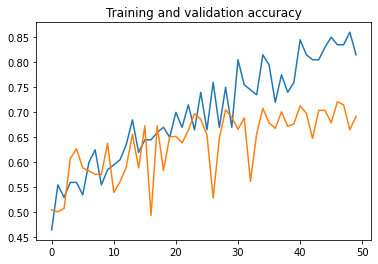

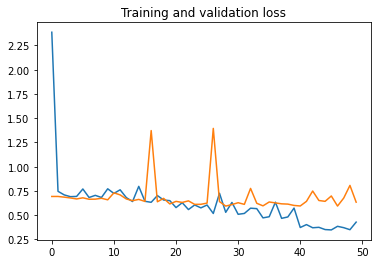

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

import matplotlib.pyplot as plt
# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )